Zomato data Analysis project

In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [68]:
dataframe=pd.read_csv("Zomato data .csv")

In [69]:
print(dataframe)

                      name online_order book_table   rate  votes  \
0                    Jalsa          Yes        Yes  4.1/5    775   
1           Spice Elephant          Yes         No  4.1/5    787   
2          San Churro Cafe          Yes         No  3.8/5    918   
3    Addhuri Udupi Bhojana           No         No  3.7/5     88   
4            Grand Village           No         No  3.8/5    166   
..                     ...          ...        ...    ...    ...   
143       Melting Melodies           No         No  3.3/5      0   
144        New Indraprasta           No         No  3.3/5      0   
145           Anna Kuteera          Yes         No  4.0/5    771   
146                 Darbar           No         No  3.0/5     98   
147          Vijayalakshmi          Yes         No  3.9/5     47   

     approx_cost(for two people) listed_in(type)  
0                            800          Buffet  
1                            800          Buffet  
2                            8

Convert the datatype of column -rate

In [70]:
def handleRate(value):
    value=str(value).split('/')
    value=value[0]
    return float(value)
dataframe['rate']=dataframe['rate'].apply(handleRate)

In [71]:
dataframe

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet
...,...,...,...,...,...,...,...
143,Melting Melodies,No,No,3.3,0,100,Dining
144,New Indraprasta,No,No,3.3,0,150,Dining
145,Anna Kuteera,Yes,No,4.0,771,450,Dining
146,Darbar,No,No,3.0,98,800,Dining


In [72]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         148 non-null    object 
 1   online_order                 148 non-null    object 
 2   book_table                   148 non-null    object 
 3   rate                         148 non-null    float64
 4   votes                        148 non-null    int64  
 5   approx_cost(for two people)  148 non-null    int64  
 6   listed_in(type)              148 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 8.2+ KB


Type of resturant

Text(0.5, 0, 'type of resturant')

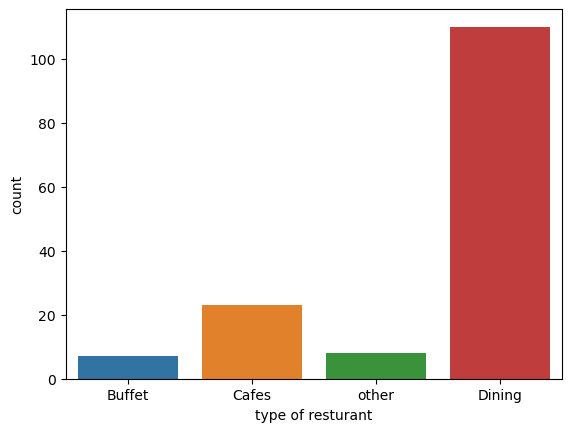

In [73]:
sns.countplot(x=dataframe['listed_in(type)'])
plt.xlabel("type of resturant")

Conclusion- majority of the resturant falls in dinning category

In [74]:
dataframe.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


Text(0, 0.5, 'votes')

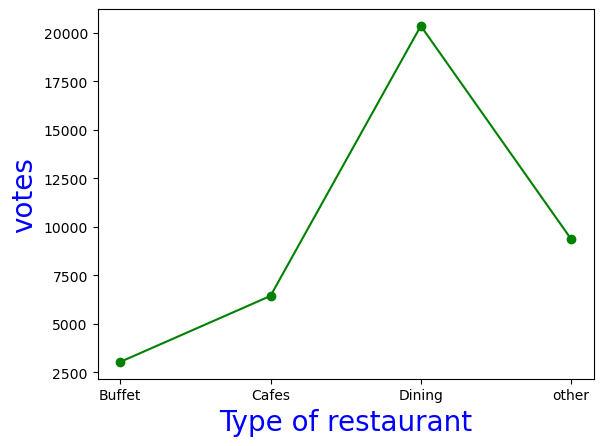

In [75]:
grouped_data=dataframe.groupby('listed_in(type)')['votes'].sum()
result=pd.DataFrame({'votes' :grouped_data})
plt.plot(result, c="green",marker="o")
plt.xlabel("Type of restaurant",c="blue", size=20)
plt.ylabel("votes",c="blue" , size=20)

Conclusion-dinning resturants has recieved maximum vote

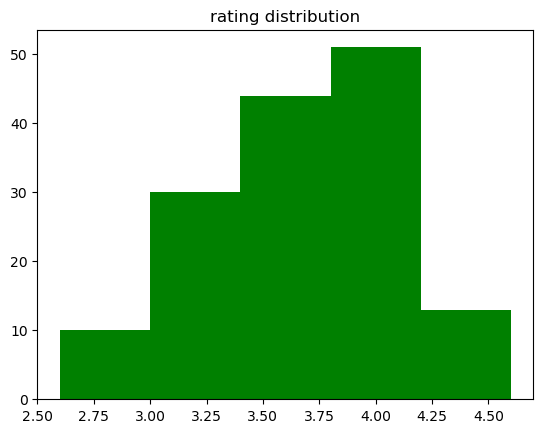

In [57]:
plt.hist(dataframe['rate'],bins=5,color="green")
plt.title("rating distribution")
plt.show()

conclusion-the majority resturants received ratings from 3.5 to 4

Average Order spending By Couples

In [58]:
dataframe.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


<Axes: xlabel='approx_cost(for two people)', ylabel='count'>

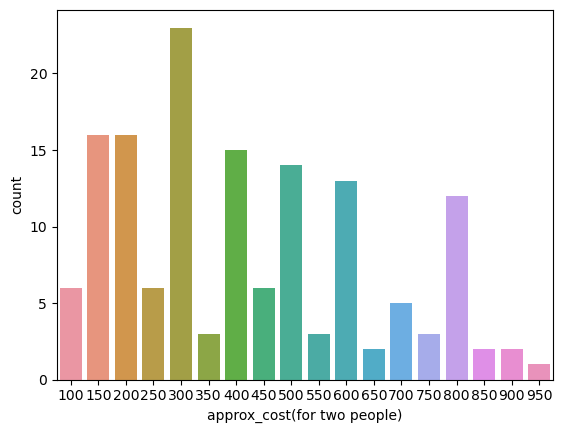

In [60]:
couple_data=dataframe['approx_cost(for two people)']
sns.countplot(x=couple_data)

conclusion-the majority of couples preferr resturant with an appximate cost of 300 rupees.

which mode receives maximum rating

<Axes: xlabel='online_order', ylabel='rate'>

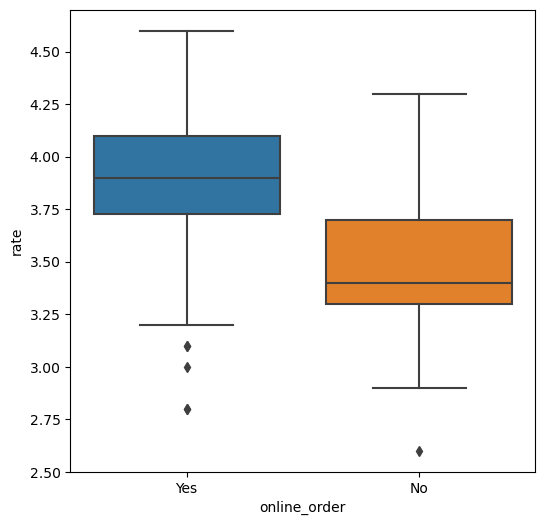

In [62]:
plt.figure(figsize=(6,6))
sns.boxplot(x="online_order",y="rate",data=dataframe)

In [ ]:
conclusion- offline order received lower rating in comparision to online order.

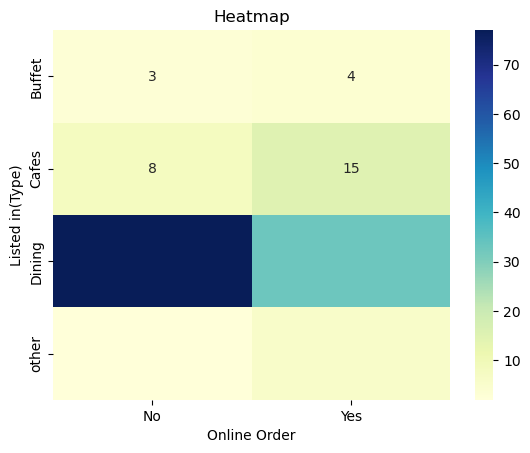

In [66]:
pivot_table=dataframe.pivot_table(index='listed_in(type)',columns='online_order',aggfunc='size',fill_value=0)
sns.heatmap(pivot_table, annot=True, cmap="YlGnBu", fmt='d')
plt.title("Heatmap")
plt.xlabel("Online Order")
plt.ylabel("Listed in(Type)")
plt.show()

Conclusion- Dinning resturants primarily accept offline orders.whereas cafes primarily receive online orders.
This suggests that clients prefer to place orders in person at resturants,but prefer online ordering at cafes.